In [1]:
###### HI HELLO
import subprocess # these 2 lines below load OS functionality
import sys
import json
import warnings
from collections import Counter # (not used)
import time # timing functions (for computation time)

from multiprocessing import Pool
#from mpi4py import MPI

import numpy as np # fast array library
import pandas as pd # data frames library
from pandas_ods_reader import read_ods #read ods tables

import matplotlib 
import matplotlib.pyplot as plt # plot library
import matplotlib.gridspec as gridspec

from IPython.display import display, HTML # screen on display in HTML library 
import ipywidgets as widgets # import 

import sympy as sp # symbolic calculation library functions
from sympy import var # symbolic calculation library variables

import mpmath as mp # double (or higher) floating point precision library (not used)

import scipy.constants as ct # import mathematical constants
import scipy.special as spec
from scipy.spatial import Voronoi, voronoi_plot_2d # import Voronoi functions
import scipy.optimize as optimize # optimazation library (not used)
from scipy import signal # noise filtering functions
from scipy import stats # statistics, for binning and fields calculation
from scipy.spatial import Voronoi, voronoi_plot_2d # import Voronoi functions
from scipy.fft import fft, ifft, fftfreq

global iscaled 
iscaled = 0

global LX, LY
LX = 1000 -250
LY = 650-50

# system size for a given (npart, rho) configuration
def L(npart, rho):
    l = np.sqrt(npart*2*np.sqrt(3.)/rho)
    return l

# print progress function
# more elegant (python 3 alternative): print('\rhello', end='',flush=True)
def printp(string):
    sys.stdout.write('\r'+ str(string))
    sys.stdout.flush()
    
#from __future__ import print_function

# Text format for figures configuration (lines below)
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
#rc('font',**{'family':'serif','serif':['Times']})
#rc('text', usetex=True)



In [ ]:
import random
import time
from mpi4py import MPI


def sample(n):
    """Make n trials of points in the square.  Return (n, number_in_circle)

    This is our basic function.  By design, it returns everything it\
    needs to compute the final answer: both n (even though it is an input
    argument) and n_inside_circle.  To compute our final answer, all we
    have to do is sum up the n:s and the n_inside_circle:s and do our
    computation"""
    n_inside_circle = 0
    for i in range(n):
        x = random.random()
        y = random.random()
        if x ** 2 + y ** 2 < 1.0:
            n_inside_circle += 1
    return n, n_inside_circle


comm = MPI.COMM_WORLD
size = comm.Get_size()
rank = comm.Get_rank()

n = 10 ** 7

if size > 1:
    n_task = int(n / size)
else:
    n_task = n

t0 = time.perf_counter()
_, n_inside_circle = sample(n_task)
t = time.perf_counter() - t0

print(f"before gather: rank {rank}, n_inside_circle: {n_inside_circle}")
n_inside_circle = comm.gather(n_inside_circle, root=0)
print(f"after gather: rank {rank}, n_inside_circle: {n_inside_circle}")

if rank == 0:
    pi_estimate = 4.0 * sum(n_inside_circle) / n
    print(
        f"\nnumber of darts: {n}, estimate: {pi_estimate}, time spent: {t:.2} seconds"
    )

In [1]:
def square(x):
    return x*x

ModuleNotFoundError: No module named 'mpi4py'

In [12]:
with Pool() as pool:
    print(pool.map(square, [1, 2, 3, 4, 5, 6]))

[1, 4, 9, 16, 25, 36]


In [1]:
%matplotlib --list

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'gtk4', 'wx', 'qt4', 'qt5', 'qt6', 'qt', 'osx', 'nbagg', 'webagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


In [4]:
# matplotlib widgets interface
%matplotlib widget


# _Read tracking data_

We explain the action of each of these functions below:

__get_info(hash_prefix)__ Reads and prints info file with hash prefix hash code. See output table in RUN CELL 0 below to grasp the info structure

__simple_pickle_read(hash_prefix) :__ This 'simple_pickle_read' takes a pkl.xz file hash prefix hash code, and which contains xy positions and tracks (no velocities) and stores in 'tabla' pandas data frame.

* input: hash_prefix
* output: global variable Ntracks (number of tracks)





In [2]:
def pdisplay(info):
    display(HTML(info.to_html()))

# This function reads pickle binary file (.pkl) with trajectories
def get_info(series_directory, hash_prefix, silent):
    global info
    nombre = '/home/fvega/Datos/blades/' + series_directory + '/info/'  + hash_prefix + '.txt'
    with open(nombre) as f:
        jsonstr = json.load(f)
    info = pd.json_normalize(jsonstr)
    if silent==False:
        pdisplay(info.T)
    return info
    
def simple_pickle_read(series_directory, hash_prefix):
    global Nframes, Ntracks
    # Read table in pickle format
    nombre = '/home/fvega/Datos/' + series_directory +  hash_prefix \
       + '_w.pkl.xz'
    tabla = pd.read_pickle(nombre, compression='infer')
    tabla = tabla.reset_index(drop=True) # por si los indices salen desordenados
    Nframes = np.max(tabla.frame)
    Ntracks = np.max(tabla.track)+1
    tabla = tabla.sort_values(by = ['frame', 'track']).reset_index(drop=True)
    return tabla

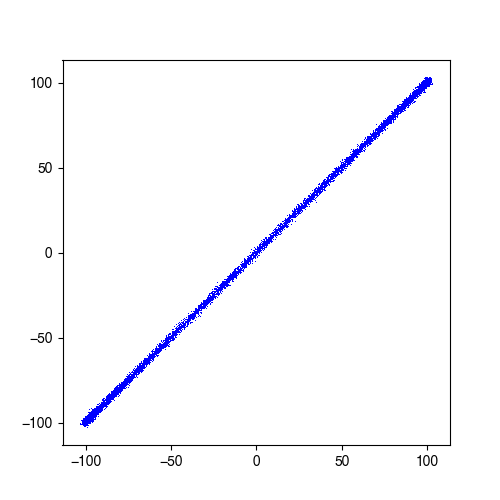

In [11]:
nsamples = 10000
t = np.linspace(0,10,nsamples)
X, Y = stats.norm.rvs(size=(2,nsamples),scale=1,loc=0) + 100 * np.sin(2 * 60 * np.pi * t) + np.sin(2 * 10 * np.pi * t) 
plt.figure(1, figsize=(5,5))
plt.plot(X,Y,',', c='b')

In [12]:
plt.close(1)

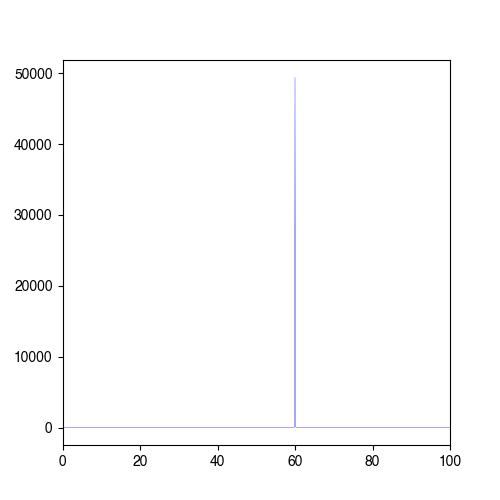

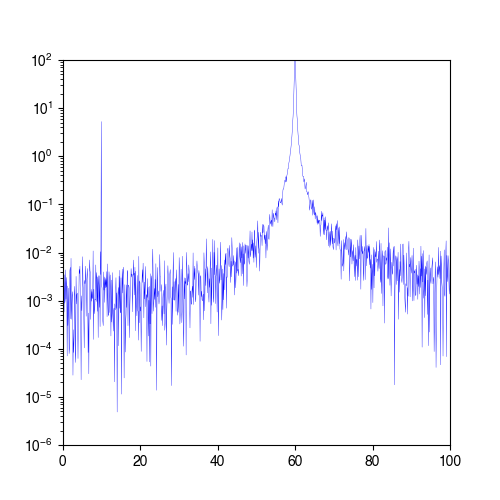

In [13]:
fX = np.zeros(len(X), dtype=np.cdouble)
fX = fft(X)
(f, S)= signal.periodogram(X, 1000, scaling='density')
plt.figure(2, figsize=(5,5))
plt.xlim([0,100])
plt.plot(f, S, lw=0.25, c='b')
plt.figure(3, figsize=(5,5))
plt.xlim([0,100])
plt.ylim(1e-6,1e2)
plt.semilogy(f, S, lw=0.25, c='b')

In [14]:
plt.close(2)
plt.close(3)

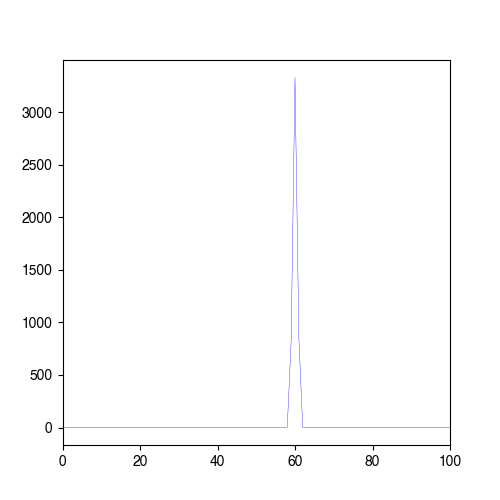

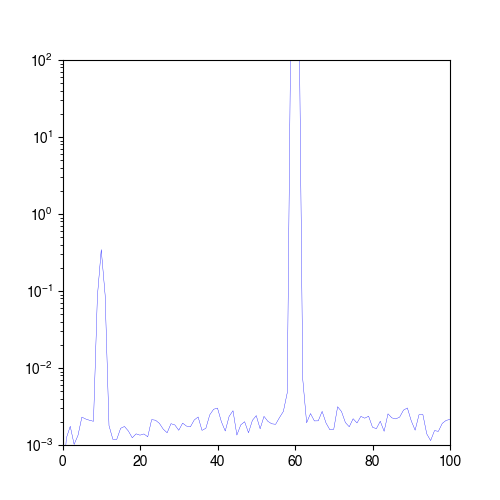

In [15]:
fX = np.zeros(len(X), dtype=np.cdouble)
fX = fft(X)
(f, S)= signal.welch(X, 1000, nperseg=nsamples/10)
plt.figure(4, figsize=(5,5))
plt.xlim([0,100])
plt.plot(f, S, lw=0.25, c='b')
plt.figure(5, figsize=(5,5))
plt.xlim([0,100])
plt.ylim(1e-3,1e2)
plt.semilogy(f, S, lw=0.25, c='b')

In [10]:
plt.close(4)
plt.close(5)

In [163]:
np.max(t)

1.0

max convolved:  892.2331654998006


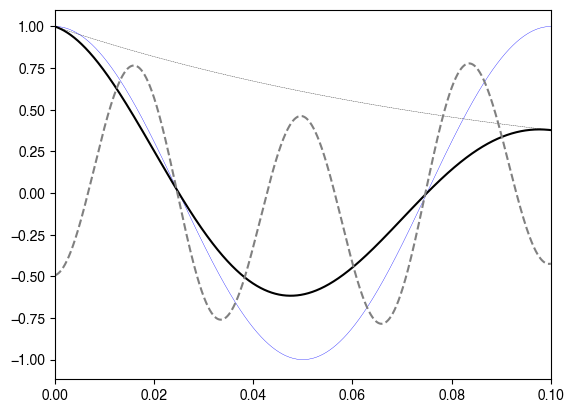

In [43]:
nsamples = 100000
nT = 1
t = nT * np.linspace(0, 1,nsamples)
nTplot = 6

fast_f = 60
slow_f = 10
smear_f = 30

exponential =  np.exp(- 10*t) + t**2
fast_cos = np.cos( fast_f * (2*np.pi*t) ) 
slow_cos = np.cos( slow_f * (2*np.pi*t) ) 
two_cos = fast_cos + slow_cos
decay_cos = exponential * slow_cos
smear_sine = np.sin( smear_f * (2*np.pi*t) )

convolved = signal.convolve(decay_cos, smear_sine, method='fft', mode='same')

plt.figure(16)
plt.xlim(0, nTplot/60)
plt.plot(t, slow_cos, c='b', lw=0.25)
#plt.plot(t, fast_cos, c='r', lw=0.25)
plt.plot(t,exponential, '--', c ='k', lw=0.25)
plt.plot(t, decay_cos, c = 'k')
plt.plot(t, convolved/np.max(convolved), '--', c='gray')
print('max convolved: ', np.max(convolved))

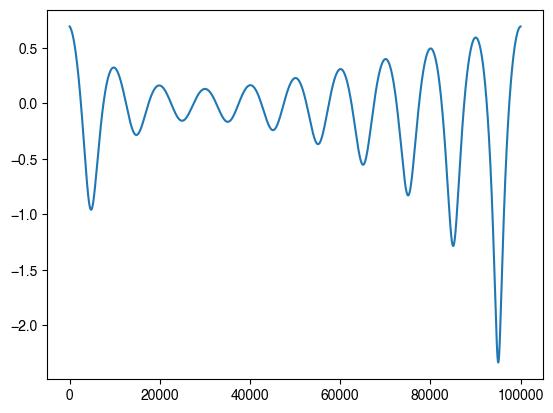

In [47]:
plt.figure(9)
plt.plot(np.log(decay_cos+1))

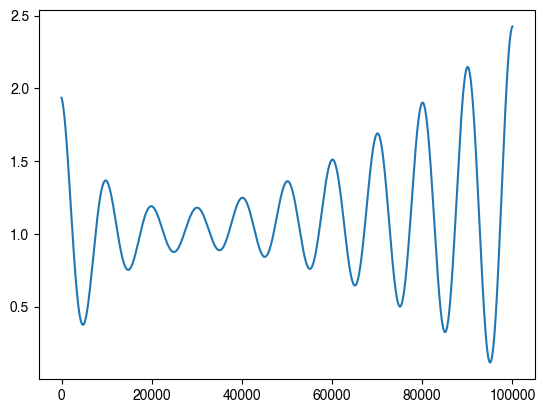

In [48]:
plt.figure(11)
plt.plot(np.exp( signal.detrend(np.log(decay_cos+1)) ))

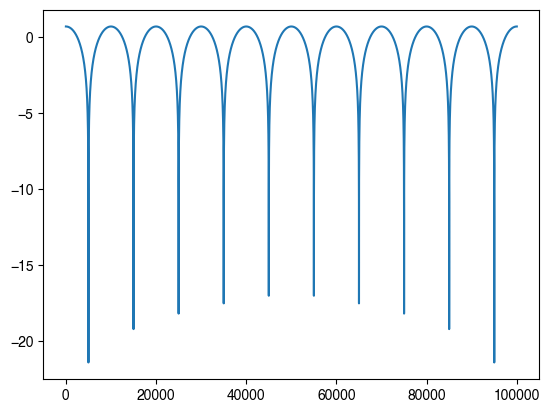

In [37]:
plt.figure(10)
plt.plot(np.log(slow_cos+1))

In [344]:
plt.close('all')

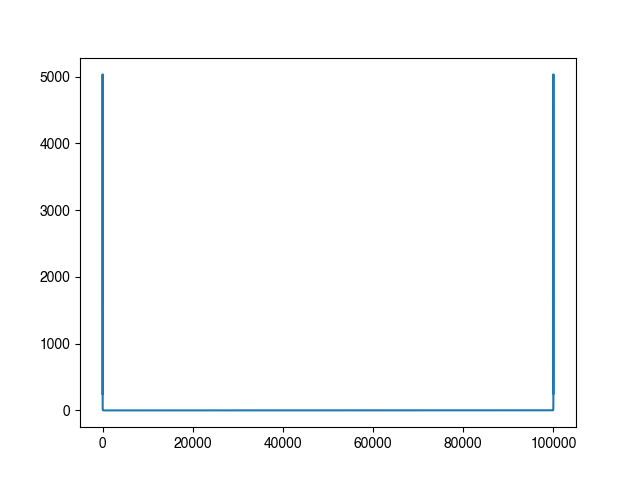

In [328]:
plt.figure(8)
plt.plot(fft(decay_cos))

In [330]:
fft(decay_cos)np.shape()

SyntaxError: invalid syntax (4216412807.py, line 1)

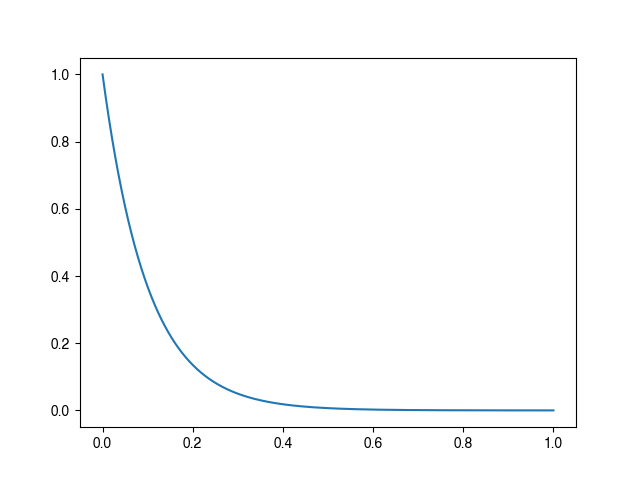

In [287]:
plt.figure(7)
plt.plot(t, exponential)

In [284]:
plt.close(7)

Text(0, 0.5, 'PSD [V**2/Hz]')

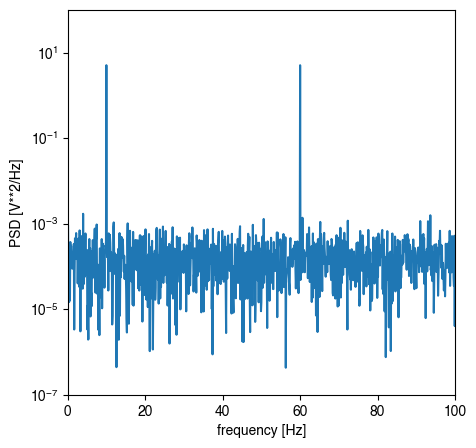

In [7]:
fs = 1000.0 # 1 kHz sampling frequency
F1 = 10 # First signal component at 10 Hz
F2 = 60 # Second signal component at 60 Hz
T = 10 # 10s signal length
N0 = -10 # Noise level (dB)
t = np.r_[0:T:(1/fs)] # Sample times

# Two Sine signal components at frequencies F1 and F2.
senal = np.sin(2 * F1 * np.pi * t) + np.sin(2 * F2 * np.pi * t) + np.random.randn(len(senal)) * 10**(N0/20.0) 

# White noise with power N0

(f, S) = signal.periodogram(senal, fs, scaling='density')
plt.figure(3, figsize=(5,5))
plt.semilogy(f, S)
plt.ylim([1e-7, 1e2])
plt.xlim([0,100])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
#plt.show()

In [131]:
fs

1000.0